# Libraries

In [1]:
library(ggplot2)
library(reshape2)

# Options

In [2]:
options(stringsAsFactors = F)

# Read in data

In [3]:
# read in color scheme
color_scheme <- read.table("RGB.MS.txt"
                           ,header = TRUE
                           ,sep = "\t"
                          )
rownames(color_scheme) <- paste(color_scheme$genotype
                               ,color_scheme$element
                               ,sep = "_")
print(color_scheme)

                    genotype element   R   G   B
WT_dot                    WT     dot   1   1   1
WT_bar                    WT     bar  51  50  50
WT_border                 WT  border   1   1   1
het_dot                  het     dot 105 153 209
het_bar                  het     bar 201 221 243
het_border               het  border   1   1   1
het+RUNX3_dot      het+RUNX3     dot  48  65 154
het+RUNX3_bar      het+RUNX3     bar 140 185 227
het+RUNX3_border   het+RUNX3  border   1   1   1
KO_dot                    KO     dot 237  34  36
KO_bar                    KO     bar 253 224 223
KO_border                 KO  border   1   1   1
KO+RUNX3_dot        KO+RUNX3     dot 159  28  32
KO+RUNX3_bar        KO+RUNX3     bar 246 158 160
KO+RUNX3_border     KO+RUNX3  border   1   1   1
het+ARID1A_dot    het+ARID1A     dot 129 129 129
het+ARID1A_bar    het+ARID1A     bar 212 212 212
het+ARID1A_border het+ARID1A  border   1   1   1


In [4]:
# list of files
files <- list.files(getwd())
print(files)

 [1] "RGB.MS.txt"                           
 [2] "RNA_1_QC_normalization_DEG.ipynb"     
 [3] "RNA_2_FAS_RUNX3_ETS1_expression.ipynb"
 [4] "TableS7_de_genes.txt"                 
 [5] "anno_Ly1.txt"                         
 [6] "anno_Ly8.txt"                         
 [7] "counts_norm_Ly1.txt"                  
 [8] "counts_norm_Ly8.txt"                  
 [9] "counts_raw_Ly1.txt"                   
[10] "counts_raw_Ly8.txt"                   
[11] "ribo_mito_filter_hg38.rds"            


In [5]:
cell_lines <- c("Ly1"
               ,"Ly8")

In [6]:
# read in counts
counts <- lapply(cell_lines
                   ,function(cell_line){
                       my_file <- files[grepl("counts_norm"
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = my_file
                               ,sep = "\t"
                               ,header = TRUE)
                   })

names(counts) <- cell_lines

print(str(counts))
print(head(rownames(counts[[1]])))

[1] "counts_norm_Ly1.txt"
[1] "counts_norm_Ly8.txt"
List of 2
 $ Ly1:'data.frame':	12256 obs. of  16 variables:
  ..$ Ly1_KO_E8_1  : num [1:12256] 640.1 39.4 50.3 27.2 29.9 ...
  ..$ Ly1_KO_E8_2  : num [1:12256] 542.8 26.8 47.7 26.8 27.6 ...
  ..$ Ly1_KO_G1_1  : num [1:12256] 645.4 46.7 41.9 38.9 31.2 ...
  ..$ Ly1_KO_G1_2  : num [1:12256] 517.3 33.1 29.4 22.1 27.6 ...
  ..$ Ly1_KO_H3_1  : num [1:12256] 647 28.2 38.5 32.5 28.2 ...
  ..$ Ly1_KO_H3_2  : num [1:12256] 595.8 19 36.7 29.5 32.8 ...
  ..$ Ly1_cas9_1_1 : num [1:12256] 588.9 26.5 24.1 42.2 29 ...
  ..$ Ly1_cas9_1_2 : num [1:12256] 572 22.4 34.8 33.6 34.8 ...
  ..$ Ly1_cas9_7_1 : num [1:12256] 568.2 18.2 38.2 38.2 30.4 ...
  ..$ Ly1_cas9_7_2 : num [1:12256] 564.9 24.2 41.2 33.3 32.1 ...
  ..$ Ly1_cas9_9_1 : num [1:12256] 544.2 36.2 29.3 53.4 22.4 ...
  ..$ Ly1_cas9_9_2 : num [1:12256] 595.6 23.3 28.4 21.8 37.8 ...
  ..$ Ly1_het_F10_1: num [1:12256] 544.3 20.6 34.3 18.3 27.4 ...
  ..$ Ly1_het_F10_2: num [1:12256] 559.2 29.8 50.7 

In [7]:
# read in anno
anno <- lapply(cell_lines
                   ,function(cell_line){
                       my_file <- files[grepl("anno_"
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = my_file
                               ,sep = "\t"
                               ,header = TRUE)
                   })

names(anno) <- cell_lines

print(str(anno))
print(head(rownames(anno[[1]])))

[1] "anno_Ly1.txt"
[1] "anno_Ly8.txt"
List of 2
 $ Ly1:'data.frame':	16 obs. of  6 variables:
  ..$ ID        : chr [1:16] "Ly1_KO_E8_1" "Ly1_KO_E8_2" "Ly1_KO_G1_1" "Ly1_KO_G1_2" ...
  ..$ Cell_line : chr [1:16] "Ly1" "Ly1" "Ly1" "Ly1" ...
  ..$ phenotype : chr [1:16] "ko" "ko" "ko" "ko" ...
  ..$ Replicate : int [1:16] 1 2 1 2 1 2 1 2 1 2 ...
  ..$ contrast  : chr [1:16] "mut" "mut" "mut" "mut" ...
  ..$ total_norm: num [1:16] 2751747 2611113 2641137 2498573 2528534 ...
 $ Ly8:'data.frame':	14 obs. of  6 variables:
  ..$ ID        : chr [1:14] "Ly8_KO_G6_1" "Ly8_KO_G6_2" "Ly8_cas9_11_1" "Ly8_cas9_11_2" ...
  ..$ Cell_line : chr [1:14] "Ly8" "Ly8" "Ly8" "Ly8" ...
  ..$ phenotype : chr [1:14] "ko" "ko" "wt" "wt" ...
  ..$ Replicate : int [1:14] 1 2 1 2 1 2 1 2 1 2 ...
  ..$ contrast  : chr [1:14] "mut" "mut" "wt" "wt" ...
  ..$ total_norm: num [1:14] 2485984 2389367 2436406 2491163 2514419 ...
NULL
[1] "Ly1_KO_E8_1" "Ly1_KO_E8_2" "Ly1_KO_G1_1" "Ly1_KO_G1_2" "Ly1_KO_H3_1"
[6] "Ly1_KO_H3_

# Variables

In [8]:
my_blue <- rgb(154
               ,196
               ,236
               ,maxColorValue = 255)

In [9]:
color_scheme["WT_bar",]$R

[1] 51

In [10]:
colors_bar <- c(WT = rgb(color_scheme["WT_bar",]$R
                        ,color_scheme["WT_bar",]$G
                        ,color_scheme["WT_bar",]$B
                         ,maxColorValue = 255
                        )
                ,het = rgb(color_scheme["het_bar",]$R
                        ,color_scheme["het_bar",]$G
                        ,color_scheme["het_bar",]$B
                         ,maxColorValue = 255
                        )
                ,KO = rgb(color_scheme["KO_bar",]$R
                        ,color_scheme["KO_bar",]$G
                        ,color_scheme["KO_bar",]$B
                         ,maxColorValue = 255
                        )
               )
print(colors_bar)

       WT       het        KO 
"#333232" "#C9DDF3" "#FDE0DF" 


In [11]:
colors_dot <- c(WT = rgb(color_scheme["WT_dot",]$R
                        ,color_scheme["WT_dot",]$G
                        ,color_scheme["WT_dot",]$B
                         ,maxColorValue = 255
                        )
                ,het = rgb(color_scheme["het_dot",]$R
                        ,color_scheme["het_dot",]$G
                        ,color_scheme["het_dot",]$B
                         ,maxColorValue = 255
                        )
                ,KO = rgb(color_scheme["KO_dot",]$R
                        ,color_scheme["KO_dot",]$G
                        ,color_scheme["KO_dot",]$B
                         ,maxColorValue = 255
                        )
               )
print(colors_dot)

       WT       het        KO 
"#010101" "#6999D1" "#ED2224" 


In [12]:
color_border <- rgb(color_scheme["WT_border",]$R
                        ,color_scheme["WT_border",]$G
                        ,color_scheme["WT_border",]$B
                         ,maxColorValue = 255
                        )
print(color_border)

[1] "#010101"


# Plots

In [13]:
pointplot <- function(data # dataframe, contains columns "genotype" (Ctrl or mut), "value" and "group_original
                    ,ylab
                    ,ylim = c(0,3.1)
                    ,fontsize = 24
                    ,fill_vector # for bars
                    ,color_vector # for dots
                    ,color_border # for border
                    ,seed = 1
                      ,title
                    ){
        
        my_means <- sapply(unique(data$genotype)
                           ,function(g){
                                   idx_g <- data$genotype == g
                                   mean(data$value[idx_g])
                           })
        my_sd <- sapply(unique(data$genotype)
                        ,function(g){
                                idx_g <- data$genotype == g
                                sd(data$value[idx_g])
                        })
        df_means <- data.frame(genotype = unique(data$genotype)
                               ,mean = my_means
                               ,sd = my_sd)
        
        ggplot() +
                scale_y_continuous(expand = c(0,0)
                                   ,limits = ylim) + # no space to x-axis
                geom_point(data = df
                            ,aes(x = genotype
                                 ,y = value
                                 ,color = group_original)
                            #,shape = 21
                            #,color = color_border
                            ,size = 5
                            #,stroke = 1
                            ,position = position_jitter(seed = seed
                                                        ,w = 0.1
                                                        ,height = 0))+
                scale_color_manual(values = color_vector)+
                geom_point(data = df
                            ,aes(x = genotype
                                 ,y = value)
                            ,shape = 1
                            ,color = color_border
                            ,size = 5
                            ,stroke = 1
                            ,position = position_jitter(seed = seed
                                                        ,width = 0.1
                                                        ,height = 0))+
                geom_errorbar(data = df_means
                              ,aes(x = genotype
                                   ,min = mean - sd
                                   ,max = mean + sd
                              )
                              ,width=0.3
                              ,lwd = 0.7
                              , colour=color_border
                              , size=1.3)+
                scale_fill_manual(values = fill_vector)+
                ylab(ylab)+
                xlab("")+
    ggtitle(title)+
                theme_classic() +
                theme(legend.position="none"
                      ,axis.title = element_text(size = fontsize)
                      ,axis.text = element_text(size = fontsize)
                      #,legend.text = element_text(size = fontsize)
                      #,legend.title = element_text(size = 0)
                      ,plot.title = element_text(size=fontsize)
                )
}


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


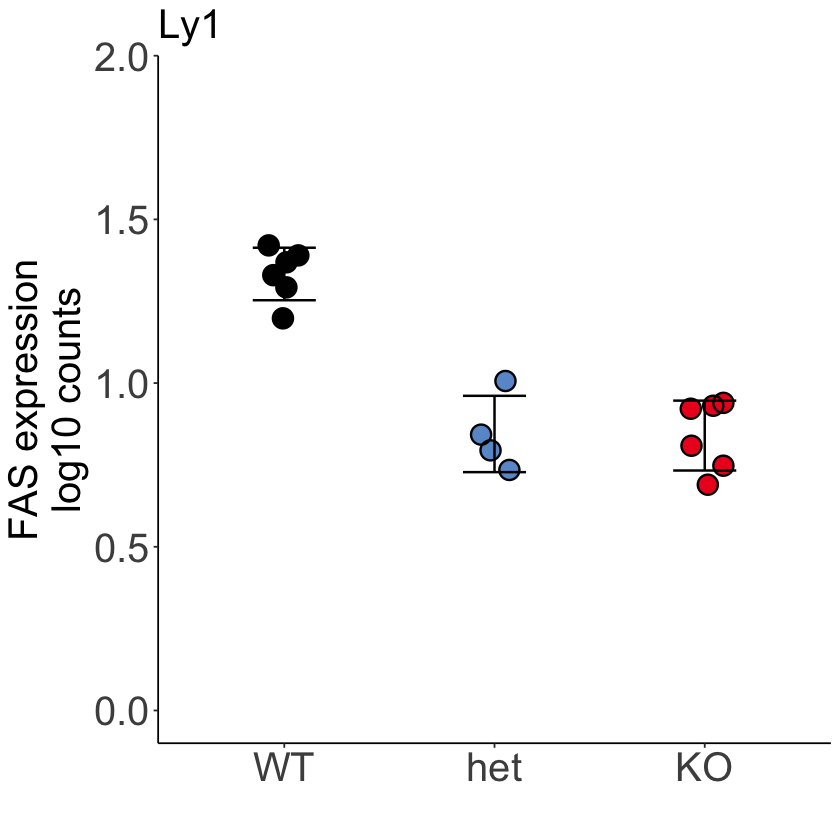

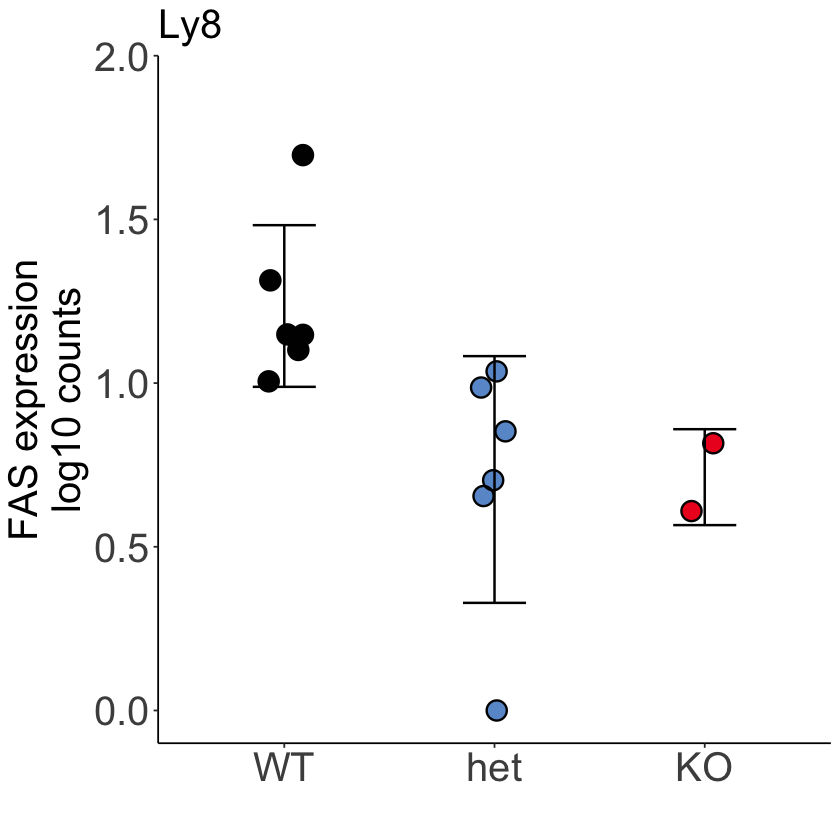

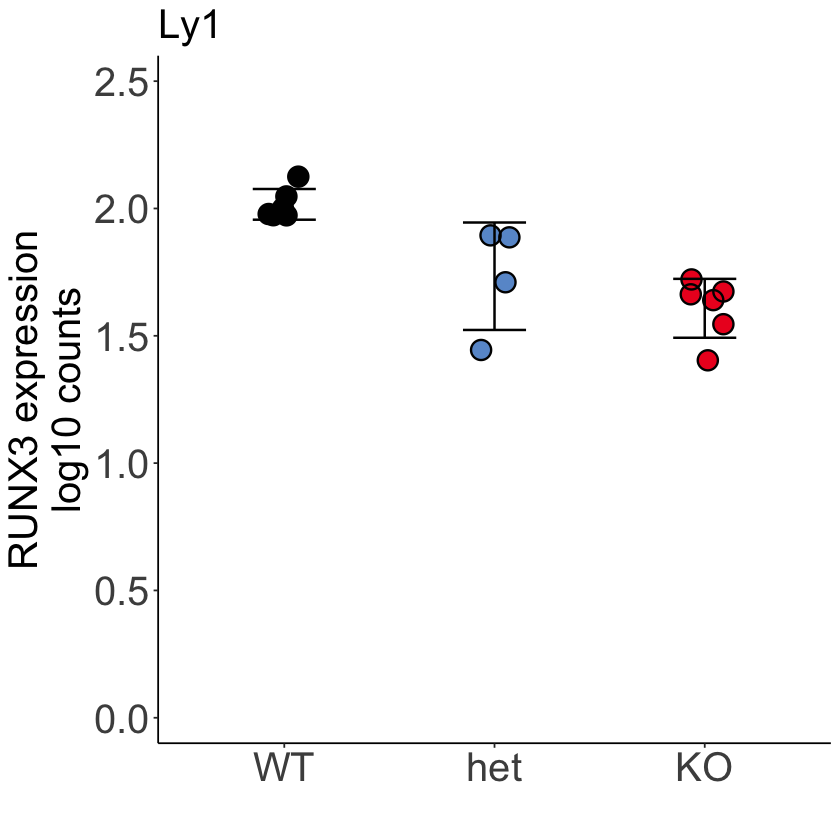

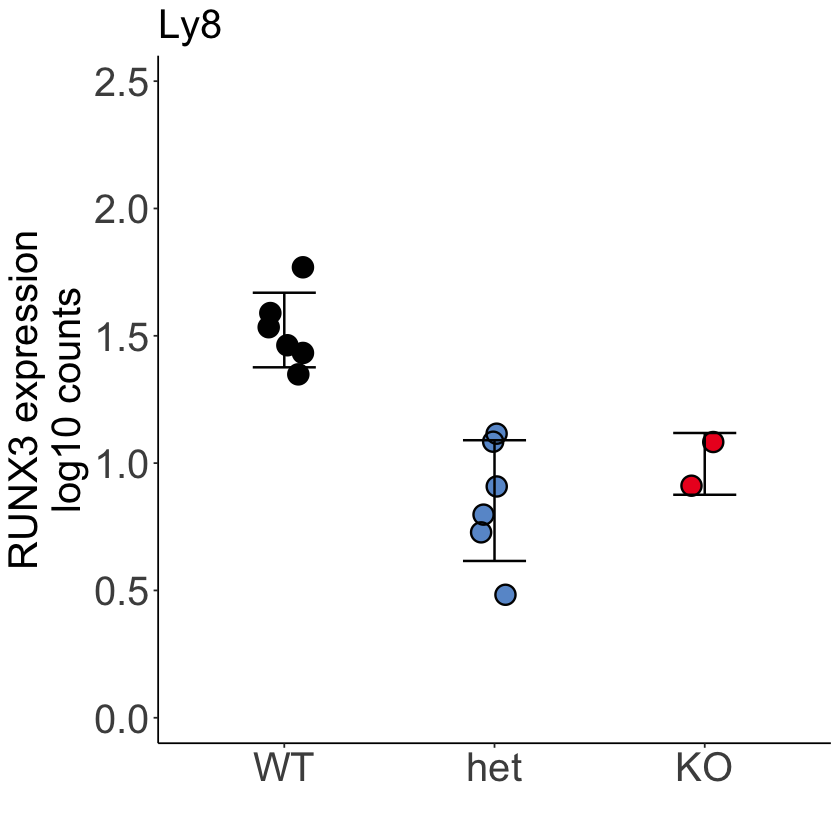

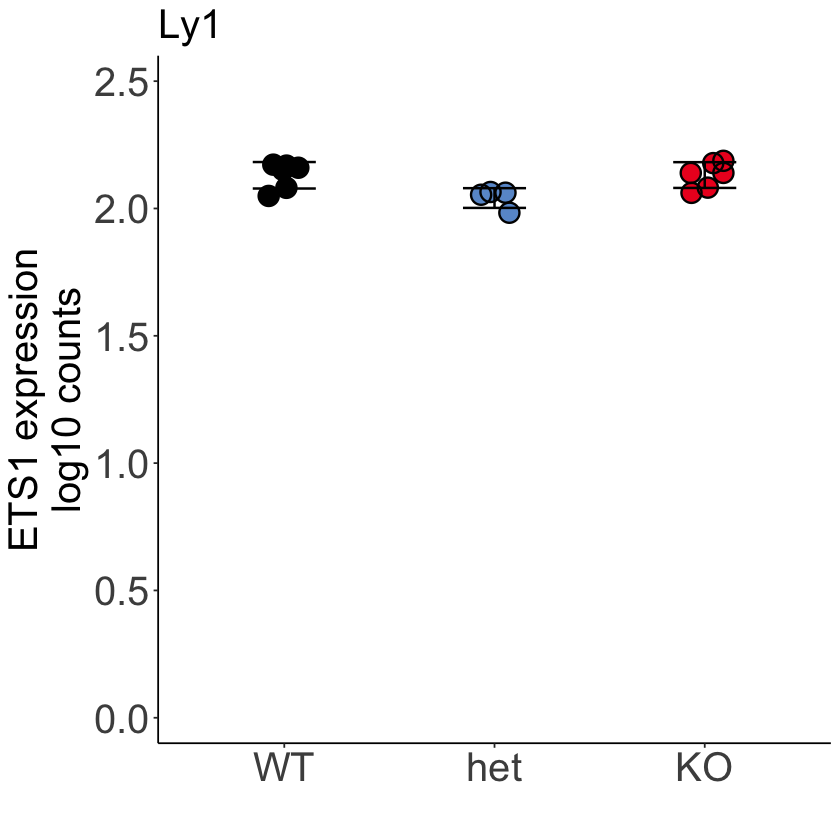

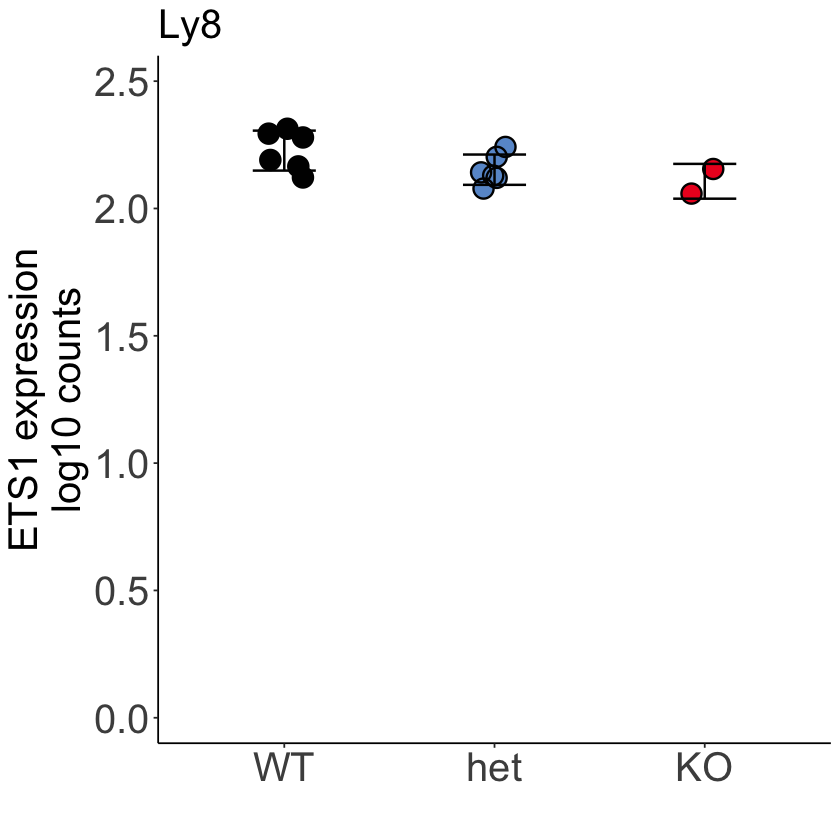

In [14]:
# plot FAS and RUNX3 expression by group

for(my_gene in c("FAS"
                ,"RUNX3"
                 ,"ETS1"
                )
   ){
    for(cell_line in cell_lines){
    
    # subset
        my_counts_FAS <- log10(counts[[cell_line]][my_gene,]+1)
        
        # make df for plotting
        df <- melt(my_counts_FAS, id.vars=c())
        
        my_levels = c("WT"
                                    ,"het"
                                    ,"KO")
        
        df$genotype <- sapply(df$variable
                             ,function(var){
                                 if(grepl("cas9"
                                         ,var)){
                                     "WT"
                                 } else if (grepl("het"
                                                 ,var)){
                                     "het"
                                 } else "KO"
                             })
    df$group_original <- df$genotype
    df$group_original <- factor(df$group_original
                         ,levels = my_levels
                          ,labels = my_levels
                          ,ordered = T
                         )
        df$genotype <- factor(df$genotype
                             ,levels = my_levels
                          ,labels = my_levels
                              ,ordered = TRUE
                             )
        
        # define ylim_max
        ifelse(my_gene == "FAS"
              ,ylim_max <- 2
              ,ylim_max <- 2.6)
        
        # plot
        
        p <- pointplot(data = df
                     ,ylim = c(-0.1,ylim_max)
                    ,ylab = paste(my_gene
                                  ,"expression\nlog10 counts")
                    ,fill_vector = colors_bar
                    ,color_vector = colors_dot
                    ,color_border = color_border
                       ,title = cell_line
                    ,seed = 2)
    print(p)
}
}


